In [1]:
import gf

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import imageio as iio
import numpy as np

import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200


In [4]:
def to_image(im):
    plt.axis('off')
    if len(im.shape)>2:
        imshow(im)
    else:
        imshow(im, cmap='gray')
    plt.show()

### Guided filter

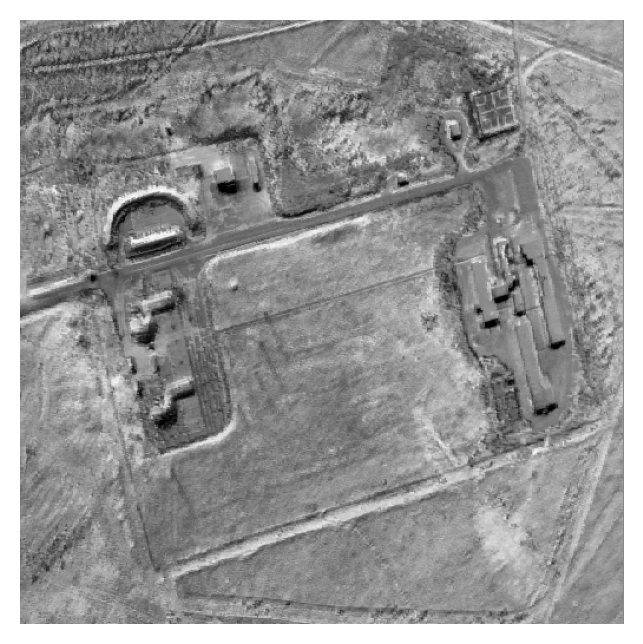

In [5]:
im = iio.imread('../data/petrovic/fused012_1.tif')/255
to_image(im)

In [6]:
from gf.filters import guided_filter

GF with grey input / grey guide

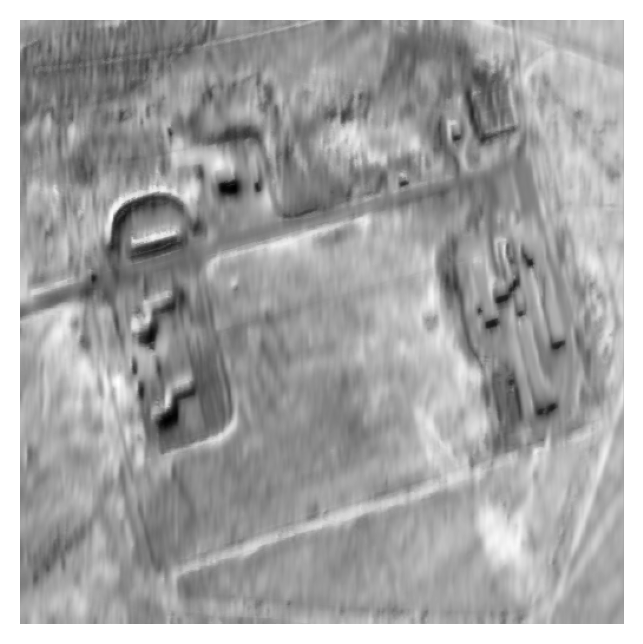

In [7]:
gf = guided_filter(im, im, 5, 0.1)
to_image(gf)

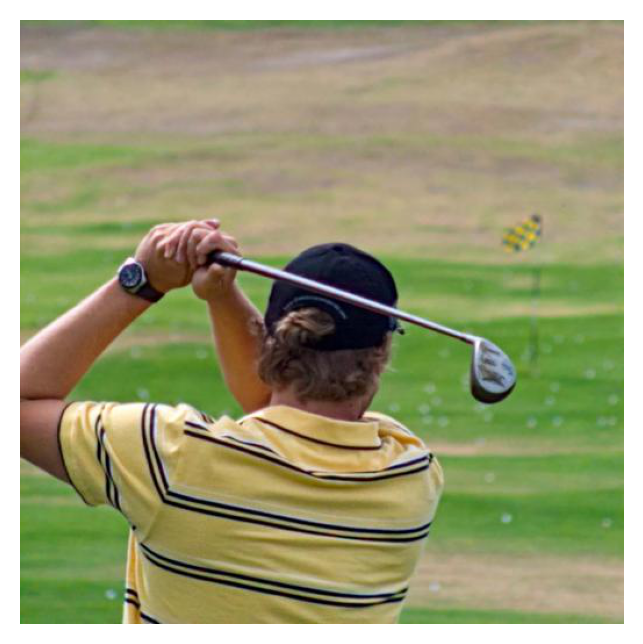

In [8]:
im2 = iio.imread('../data/lytro/lytro-01-A.jpg')/255
to_image(im2)

GF with rgb input / grey guide

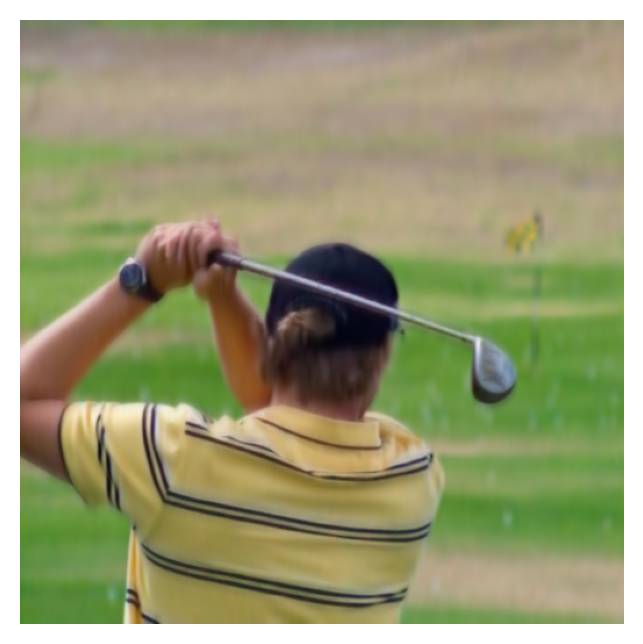

In [9]:
gf = guided_filter(im2, im2[:,:,0], 5,0.05)
to_image(gf)

GF with rgb input / rgb guide

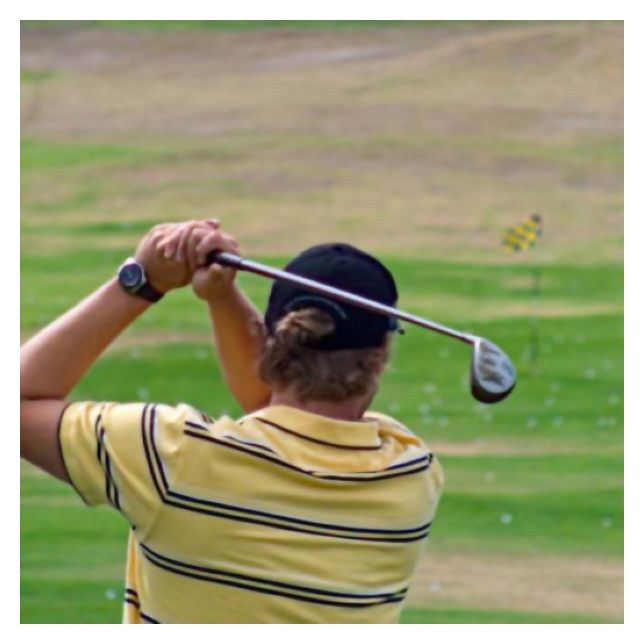

In [10]:
gf = guided_filter(im2, im2, 1,0.05)
to_image(gf)

### Decomposition

In [11]:
from gf.fusion import decompose

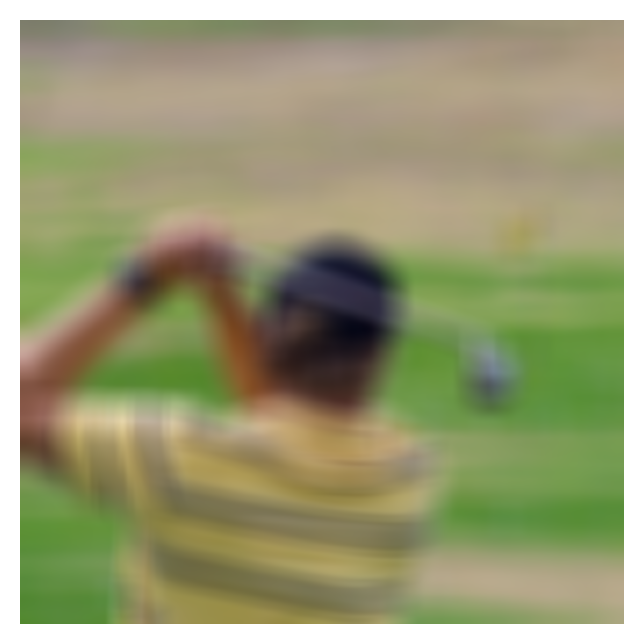

In [12]:
b, d = decompose(im2)
to_image(b)

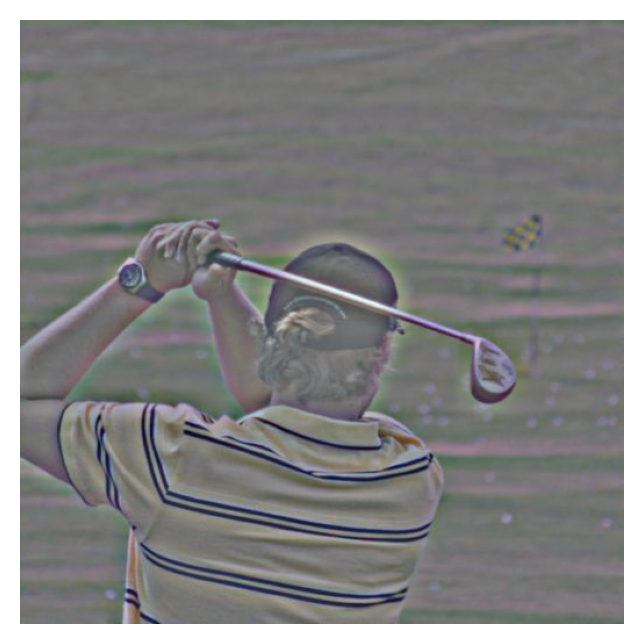

In [13]:
md, Md = np.min(d), np.max(d)
to_image((d-md)/(Md-md))

### Salicency map

In [14]:
from gf.fusion import saliency

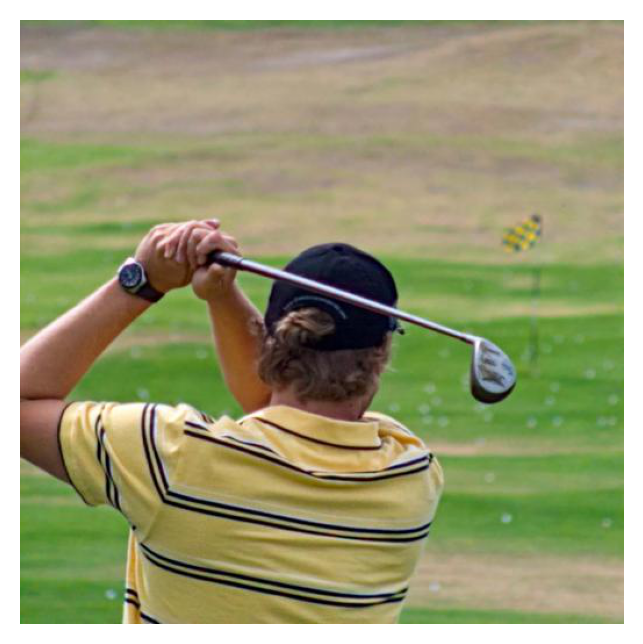

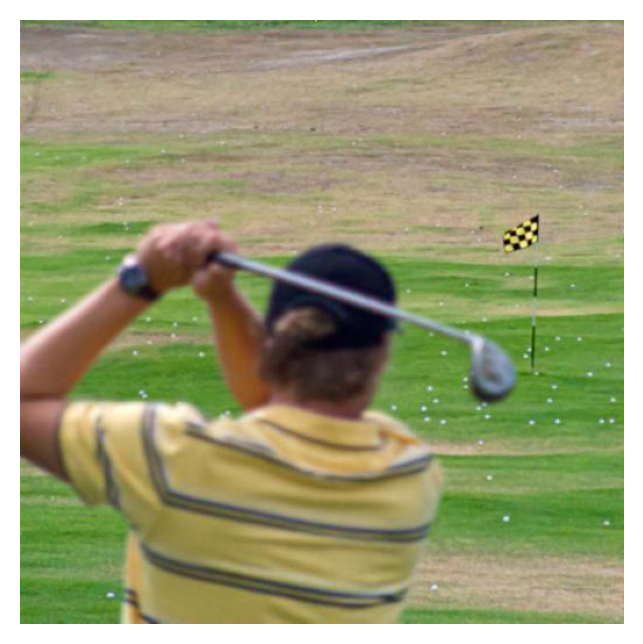

In [15]:
images_paths = ['../data/lytro/lytro-01-'+x+'.jpg' for x in ['A', 'B']]
ims = [iio.imread(path)/255 for path in images_paths]
for im in ims:
    to_image(im)

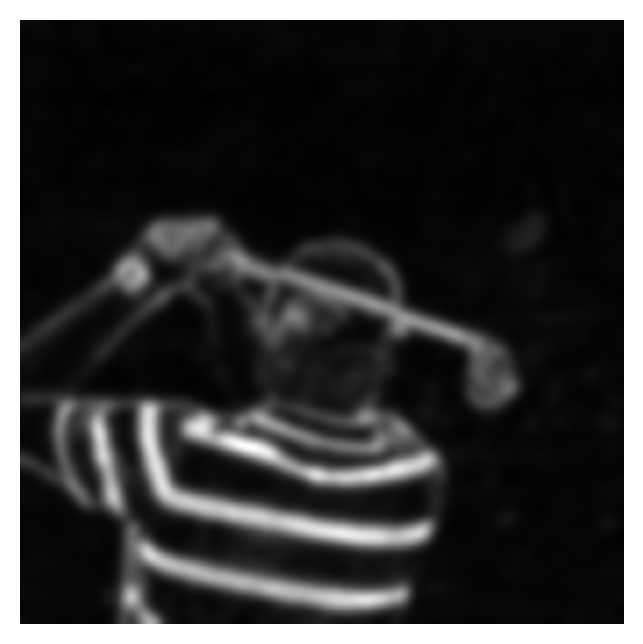

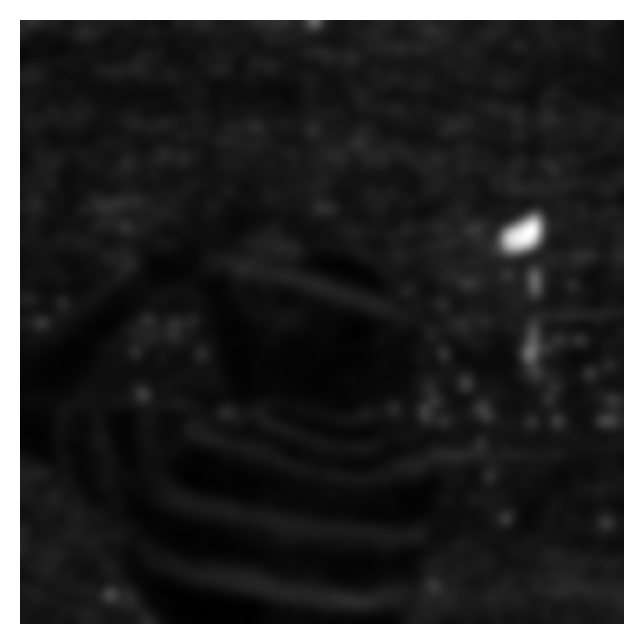

In [16]:
for im in ims:
    to_image(saliency(im))

### Weights

In [17]:
from gf.fusion import weight_maps

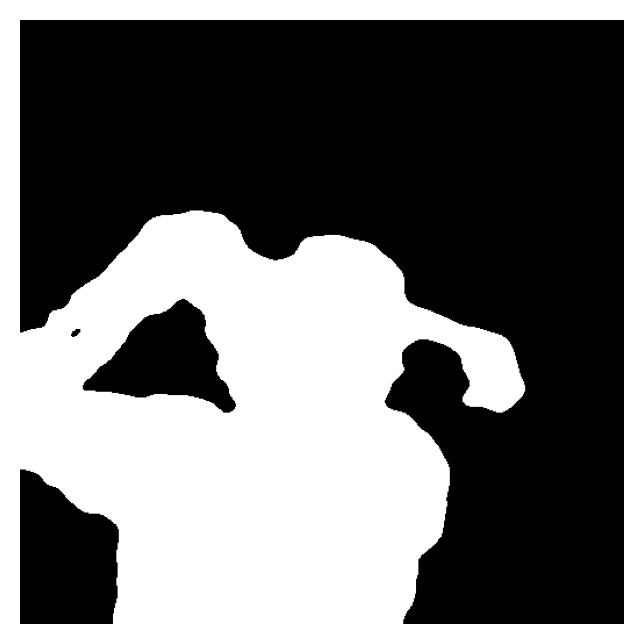

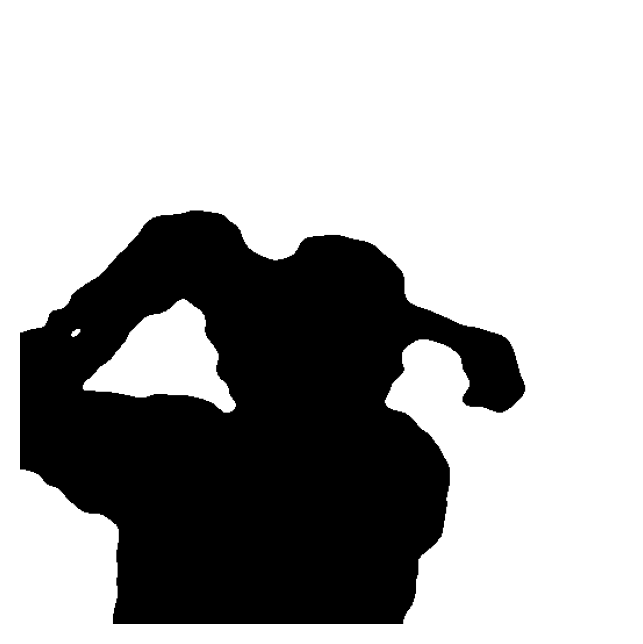

In [18]:
weights = weight_maps(ims)
to_image(weights[0])
to_image(weights[1])

### Fusion

In [19]:
from gf.fusion import fusion

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


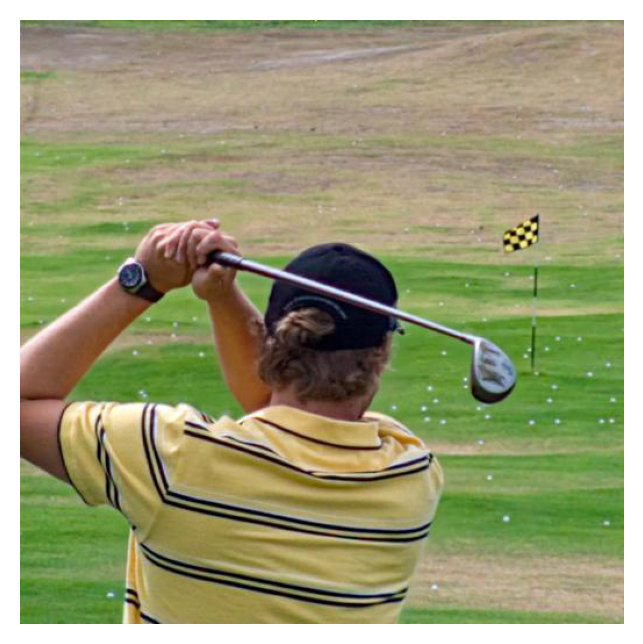

In [20]:
f = fusion(ims)
to_image(f)